# Sprint 17 - Proyecto Final

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

**Servicios de Interconnect**

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.


**Descripción de los datos**

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.



## Introducción

Para dar inicio al proyecto final, comenzaremos con la estructura seguida en los sprints previos. Es decir, ir generando una Tabla de Contenido con sus índices y subíndices respectivos. Posteriormente comenzaremos con la inicialización de librerías y carga de datos para después volcarnos al preprocesamiento, análisis y generacion de Modelos.

Hay que recordar que el objetivo primordial es lograr que los clientes de Interconnect no se vayan, por lo que el análisis de datos debe ser exhaustivo para cumplir con las mejores métricas que permitan que esto ocurra.

## Inicializacion

Comenzamos cargando las librerías necesarias para nuestro proyecto.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve

## Carga de Datos

Seleccionamos los dataset requeridos para llevar a cabo nuestro futuro análisis.

In [2]:
contract = pd.read_csv("/datasets/final_provider/contract.csv")
personal = pd.read_csv("/datasets/final_provider/personal.csv")
internet = pd.read_csv("/datasets/final_provider/internet.csv")
phone = pd.read_csv("/datasets/final_provider/phone.csv")

In [3]:
contract.info()
contract

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [4]:
personal.info
personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [5]:
internet.info
internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [6]:
phone.info
phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


Todos los dataset vienen de forma predeterminada con la separación por coma. Adicionalmente, la columna en común es el customerID por lo que deberemos efectuar algunos merge eventualmente para tener la data unificada.

## EDA

Revisemos un poco los datos que nos entregan los dataset.

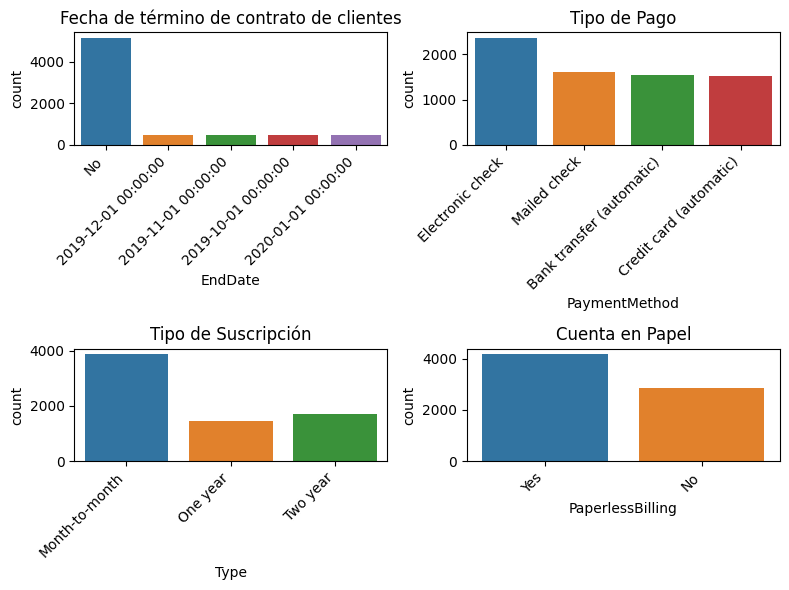

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))  # 1 fila, 2 columnas, tamaño de la figura


sns.countplot(x = contract["EndDate"], ax = axes[0,0])
axes[0,0].set_title("Fecha de término de contrato de clientes")

sns.countplot(x = contract["PaymentMethod"], ax = axes[0,1])
axes[0,1].set_title('Tipo de Pago')

sns.countplot(x = contract["Type"], ax = axes[1,0])
axes[1,0].set_title("Tipo de Suscripción")

sns.countplot(x = contract["PaperlessBilling"], ax = axes[1,1])
axes[1,1].set_title("Cuenta en Papel")

for ax in axes.flatten():
    # Obtén las etiquetas actuales y aplícales la rotación
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

Del primer dataset Observamos que la mayoría de los clientes prefiere el pago del plan con cheque electrónico y el resto se divide proporcionalmente casi igual en cheque por correo, transferencia bancaria y pago automático con tarjeta. 

Por otra parte, la mayoría de clientes se decanta con el pago mes a mes del plan y el resto en proporciones similares en suscripciones anuales y bi-anuales.

Por último, la mayoría prefiere recibir su cuenta mediante papel (poco ecológico en estos tiempos).

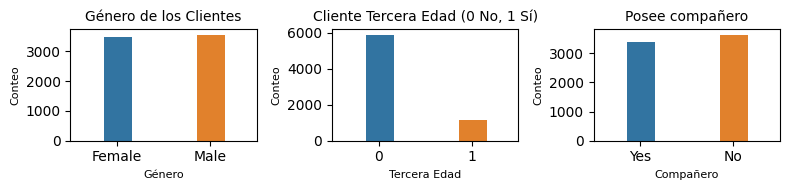

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(8, 2))  # Ajustar el tamaño de la figura

# Primer gráfico: Género
sns.countplot(x=personal["gender"], ax=axes[0])
axes[0].set_title("Género de los Clientes", fontsize=10)
axes[0].set_xlabel("Género", fontsize=8)
axes[0].set_ylabel("Conteo", fontsize=8)

# Ajustar ancho y posición de las barras
for bar in axes[0].containers[0]:
    bar.set_width(0.3)  # Reducir ancho de barra
    bar.set_x(bar.get_x() + 0.26)  # Reposicionar para centrar

# Segundo gráfico: Cliente Tercera Edad
sns.countplot(x=personal["SeniorCitizen"], ax=axes[1])
axes[1].set_title("Cliente Tercera Edad (0 No, 1 Sí)", fontsize=10)
axes[1].set_xlabel("Tercera Edad", fontsize=8)
axes[1].set_ylabel("Conteo", fontsize=8)

# Ajustar ancho y posición de las barras
for bar in axes[1].containers[0]:
    bar.set_width(0.3)  # Reducir ancho de barra
    bar.set_x(bar.get_x() + 0.26)  # Reposicionar para centrar
    
# Tercer gráfico: Partner
sns.countplot(x=personal["Partner"], ax=axes[2])
axes[2].set_title("Posee compañero", fontsize=10)
axes[2].set_xlabel("Compañero", fontsize=8)
axes[2].set_ylabel("Conteo", fontsize=8)

# Ajustar ancho y posición de las barras
for bar in axes[2].containers[0]:
    bar.set_width(0.3)  # Reducir ancho de barra
    bar.set_x(bar.get_x() + 0.26)  # Reposicionar para centrar

    

# Ajustar diseño
plt.tight_layout()
plt.show()

In [9]:
personal["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Para el segundo dataset, tenemos que los géneros están bastante equiparados, no habiendo inclinación alguna si los clientes son mayoritariamente hombres o mujeres. Por otra parte, la mayoría no son personas de mayor edad.

Seguiremos el análisis una vez hagamos nuestra preparación de datos, ya que debemos hacer una fusión de los dataset y posteriormente revisar el comportamiento de la variable objetivo, la cual también debe ser trabajada.

## Preparación de los Datos

Ahora, Haremos un merge de nuestros datasets para tener la data unificada y posteriormente continuaremos con el preprocesamiento.

In [10]:
dataframes = [contract, personal, internet, phone]
df = dataframes[0]
for dataframe in dataframes[1:]:
    df = pd.merge(df, dataframe, on='customerID', how='left')

df.columns = df.columns.str.lower()
df

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   seniorcitizen     7043 non-null   int64  
 10  partner           7043 non-null   object 
 11  dependents        7043 non-null   object 
 12  internetservice   5517 non-null   object 
 13  onlinesecurity    5517 non-null   object 
 14  onlinebackup      5517 non-null   object 
 15  deviceprotection  5517 non-null   object 
 16  techsupport       5517 non-null   object 


### Transformación de Columnas a sus Tipos Correctos

Haremos la transformación de los tipos de datos de las columnas numéricas a lo que correspondan.

In [12]:
df["begindate"] = pd.to_datetime(df["begindate"], format = '%Y-%m-%d')

Ahora, para el caso de nuestra columna totalcharges y su transformación a float64 tenemos la particularidad de que hay celdas en blanco, las cuales pueden ser identificadas de la siguiente forma:

In [13]:
df[df["totalcharges"].eq(' ')]

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


In [14]:
df[df["begindate"] == "2020" ].sample(10)

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
3457,8566-YPRGL,2020-01-01,No,Month-to-month,Yes,Mailed check,19.50,19.5,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4607,2853-CWQFQ,2020-01-01,No,Month-to-month,Yes,Mailed check,59.55,59.55,Male,0,No,Yes,DSL,No,No,No,Yes,No,Yes,No
4484,7465-ZZRVX,2020-01-01,No,Month-to-month,Yes,Electronic check,70.35,70.35,Male,0,No,No,Fiber optic,No,No,No,No,No,No,No
4534,2607-FBDFF,2020-01-01,No,Month-to-month,No,Credit card (automatic),49.00,49,Male,0,No,No,DSL,No,No,No,Yes,No,No,No
3753,1816-FLZDK,2020-01-01,No,Month-to-month,No,Mailed check,29.15,29.15,Male,0,No,No,DSL,No,No,No,Yes,No,No,NaN
4540,6728-WYQBC,2020-01-01,No,Month-to-month,No,Bank transfer (automatic),20.95,20.95,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
310,1098-TDVUQ,2020-01-01,No,Month-to-month,Yes,Bank transfer (automatic),19.25,19.25,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2037,8309-IEYJD,2020-01-01,No,Month-to-month,Yes,Mailed check,70.60,70.6,Female,1,No,No,Fiber optic,No,No,No,No,No,No,No
685,1536-HBSWP,2020-01-01,No,Month-to-month,Yes,Electronic check,49.90,49.9,Female,0,No,No,DSL,No,No,No,Yes,No,No,No
4641,9895-VFOXH,2020-01-01,No,Month-to-month,No,Mailed check,24.40,24.4,Female,0,No,No,DSL,No,No,No,No,No,No,NaN


Para los valores ausentes del punto anterior (total charges), considerando que son todos del 2020 y enero (begindate), revisando los datos que si poseen facturacion mensual y total en estas fechas, nos damos cuenta que el valor es el mismo en ambas columnas, por lo que se replicará para estos.

In [15]:
def fill_missing_totalcharges(df):
    # Reemplazar valores vacíos (' ') con NaN
    df['totalcharges'] = df['totalcharges'].replace(' ', np.nan).astype(float)
    # Rellenar los valores NaN con monthlycharges
    df['totalcharges'] = df['totalcharges'].fillna(df['monthlycharges'])
    return df

In [16]:
df = fill_missing_totalcharges(df)
df

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [17]:
df[df['totalcharges'].eq(' ')] 

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines


Con ello ya solucionamos el problema en la columna totalcharges y con ello puede pasar a numérica.

In [18]:
df["totalcharges"] = df["totalcharges"].astype("float64")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   object        
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   seniorcitizen     7043 non-null   int64         
 10  partner           7043 non-null   object        
 11  dependents        7043 non-null   object        
 12  internetservice   5517 non-null   object        
 13  onlinesecurity    5517 non-null   object        
 14  onlinebackup      5517 n

### Procesamiento de Datos Ausentes y Duplicados

Comprobando que no existan datos duplicados de clientes, nos dedicaremos a ver si existen datos ausentes y qué haremos con ellos.

In [20]:
df.duplicated().sum()

0

In [21]:
df.isna().sum()

customerid             0
begindate              0
enddate                0
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
gender                 0
seniorcitizen          0
partner                0
dependents             0
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
multiplelines        682
dtype: int64

In [22]:
df["internetservice"].value_counts(dropna = False)

Fiber optic    3096
DSL            2421
NaN            1526
Name: internetservice, dtype: int64

In [23]:
df["onlinesecurity"].value_counts(dropna = False)

No     3498
Yes    2019
NaN    1526
Name: onlinesecurity, dtype: int64

In [24]:
df["onlinebackup"].value_counts(dropna = False)

No     3088
Yes    2429
NaN    1526
Name: onlinebackup, dtype: int64

In [25]:
df["deviceprotection"].value_counts(dropna = False)

No     3095
Yes    2422
NaN    1526
Name: deviceprotection, dtype: int64

In [26]:
df["multiplelines"].value_counts(dropna = False)

No     3390
Yes    2971
NaN     682
Name: multiplelines, dtype: int64

Tenemos 8 columnas con datos ausentes, 7 de ellas con exactamente 1526 datos ausentes y la octava con 682.
Rellenaremos los datos ausentes con no_data para tener cuantificado aquello.


In [27]:
df = df.fillna("no_data")

In [28]:
df["deviceprotection"].value_counts(dropna = False)

No         3095
Yes        2422
no_data    1526
Name: deviceprotection, dtype: int64

Ahora, poseemos información relevante respecto de la fecha de arribo de un cliente y la fecha de término de su contrato o cuando dejó de ser cliente. Por ende, haremos uso de aquello para generar otra columna de características.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   object        
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   seniorcitizen     7043 non-null   int64         
 10  partner           7043 non-null   object        
 11  dependents        7043 non-null   object        
 12  internetservice   7043 non-null   object        
 13  onlinesecurity    7043 non-null   object        
 14  onlinebackup      7043 n

Primero, convertimos enddate a tipo datetime, obviando los clientes que aun no han dejado de serlo con errors = coerce.

In [30]:
df["enddate"] = pd.to_datetime(df["enddate"], format = '%Y-%m-%d', errors = 'coerce')
df["enddate"].value_counts(dropna = False)

NaT           5174
2019-11-01     485
2019-12-01     466
2020-01-01     460
2019-10-01     458
Name: enddate, dtype: int64

Lo anterior es correcto, tenemos 5174 clientes que aun no dejan de serlo, pero el resto si posee fecha de salida de la compañia como cliente.

Ahora, generamos una nueva columna con la resta de ambas fechas, para determinar el tiempo que fueron clientes.

In [31]:
df["daysclient"] = (df['enddate'] - df["begindate"]).dt.days

In [32]:
df["daysclient"].value_counts(dropna = False)

NaN       5174
31.0       198
30.0       182
61.0       123
153.0       64
          ... 
1949.0       2
1917.0       1
1218.0       1
1340.0       1
2161.0       1
Name: daysclient, Length: 132, dtype: int64

En el enunciado nos señalan que los datos son tomados respecto del contrato hasta el 1 de Febrero de 2020, por lo que los clientes que aun lo son, se declararán con aquella fecha límite de enddate.

In [33]:
df.loc[pd.isna(df["daysclient"]), "daysclient"] = (pd.Timestamp("2020-02-01") - 
                                                   df.loc[pd.isna(df["daysclient"]), "begindate"]).dt.days

In [34]:
df["daysclient"].value_counts(dropna = False)

31.0      431
2191.0    362
30.0      182
92.0      169
2163.0    164
         ... 
1369.0      2
1948.0      2
1705.0      2
2161.0      1
1917.0      1
Name: daysclient, Length: 156, dtype: int64

Con esto, añadimos una columna que puede ayudar esencialmente para dar más información a la hora de efectuar modelos.

In [40]:
df

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,daysclient
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,DSL,No,Yes,No,No,No,No,no_data,31.0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,1036.0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,61.0
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,no_data,1371.0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,One year,Yes,Mailed check,84.80,1990.50,Male,0,...,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,730.0
7039,2234-XADUH,2014-02-01,NaT,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,...,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,2191.0
7040,4801-JZAZL,2019-03-01,NaT,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,...,Yes,DSL,Yes,No,No,No,No,No,no_data,337.0
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,Male,1,...,No,Fiber optic,No,No,No,No,No,No,Yes,123.0


Para la columna objetivo "enddate" cambiaremos las fechas por las que el cliente dejó de serlo con el string "Yes", para tener solo dos opciones: si el cliente dejó de serlo o si aun lo es.

In [41]:
def cambiar_yes_no(fecha):
    return "Yes" if pd.notna(fecha) else "No"
df['enddate'] = df["enddate"].apply(cambiar_yes_no) 
df["enddate"].value_counts(dropna = False)

No     5174
Yes    1869
Name: enddate, dtype: int64

Con la transformación previa, ya podemos ver que de los 7043 clientes, solo 1869 han dejado de serlo en la compañia.

In [42]:
df

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,daysclient
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,DSL,No,Yes,No,No,No,No,no_data,31.0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,1036.0
2,3668-QPYBK,2019-10-01,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,61.0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,no_data,1371.0
4,9237-HQITU,2019-09-01,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50,Male,0,...,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,730.0
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,...,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,2191.0
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,...,Yes,DSL,Yes,No,No,No,No,No,no_data,337.0
7041,8361-LTMKD,2019-07-01,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,Male,1,...,No,Fiber optic,No,No,No,No,No,No,Yes,123.0


La columna customerid no nos presentará ningun valor al efectuar el análisis, y hay otras que también se consideran ruidosas para el mismo, por lo que las eliminaremos de nuestros datos. No creo que sea relevante para el análisis si el cliente quería su cuenta en papel o digital, o el medio de pago.

In [43]:
df.drop(["customerid", "begindate","paperlessbilling","paymentmethod"], axis = 1, inplace = True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   enddate           7043 non-null   object 
 1   type              7043 non-null   object 
 2   monthlycharges    7043 non-null   float64
 3   totalcharges      7043 non-null   float64
 4   gender            7043 non-null   object 
 5   seniorcitizen     7043 non-null   int64  
 6   partner           7043 non-null   object 
 7   dependents        7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  multiplelines     7043 non-null   object 
 16  daysclient        7043 non-null   float64


### Codificación de Datos

Para nuestra codificación, ya que la mayoría de columnas son categoricas y no poseen un orden jerarquico definido, utilizaremos One Hot Encoding en su forma sencilla (pd.get_dummies)

In [45]:
col_categoricas = df.select_dtypes(include='object').columns

In [46]:
data_ohe = pd.get_dummies(df,columns=col_categoricas, drop_first=True)

In [47]:
data_ohe.columns = data_ohe.columns.str.lower()
data_ohe.rename(columns={"enddate_yes":"enddate"}, inplace=True)

In [48]:
data_ohe

,monthlycharges,totalcharges,seniorcitizen,daysclient,enddate,type_one year,type_two year,gender_male,partner_yes,dependents_yes,...,deviceprotection_yes,deviceprotection_no_data,techsupport_yes,techsupport_no_data,streamingtv_yes,streamingtv_no_data,streamingmovies_yes,streamingmovies_no_data,multiplelines_yes,multiplelines_no_data
0,29.85,29.85,0,31.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,56.95,1889.50,0,1036.0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,53.85,108.15,0,61.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42.30,1840.75,0,1371.0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,70.70,151.65,0,61.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,730.0,0,1,0,1,1,1,...,1,0,1,0,1,0,1,0,1,0
7039,103.20,7362.90,0,2191.0,0,1,0,0,1,1,...,1,0,0,0,1,0,1,0,1,0
7040,29.60,346.45,0,337.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
7041,74.40,306.60,1,123.0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


### Segmentación del Dataset

In [49]:
#generamos una funcion para dividir nuestro dataset dos veces usando la funcion train_test_split

def split_train_val_test(df_input, stratify_colname='y', frac_train=0.6, frac_val=0.2, frac_test=0.2, 
                         random_state=12345):
    

    if frac_train + frac_val + frac_test != 1.0: #verifica que la suma de las particiones de 1
        raise ValueError('Los elementos %f, %f, %f no suman 1.0' % \
                         (frac_train, frac_val, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError('%s no es una columna en el dataframe' % (stratify_colname))

    X = df_input # Posee todas las columnas
    y = df_input[[stratify_colname]] # la columna en la cual basamos el analisis

    # Divide el dataframe en porciones temporales
    df_train, df_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=(1.0 - frac_train),
                                                          random_state=random_state)

    # Divide finalmente el dataframe utilizando las porciones temporales para obtener las 3 partes
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(df_temp, y_temp, stratify=y_temp, 
                                                      test_size=relative_frac_test, random_state=random_state)

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test) #Verifica la integridad de los datos

    return df_train, df_val, df_test

In [50]:
df_train, df_val, df_test = split_train_val_test(data_ohe, stratify_colname='enddate', 
                                                 frac_train=0.60, frac_val=0.20, frac_test=0.20)

In [51]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(4225, 26)
(1409, 26)
(1409, 26)


In [52]:
features_train = df_train.drop("enddate", axis = 1)
target_train = df_train["enddate"]
features_valid = df_val.drop("enddate", axis = 1)
target_valid = df_val["enddate"]
features_test = df_test.drop("enddate", axis = 1)
target_test = df_test["enddate"]

In [53]:
target_test

5007    0
2576    0
409     1
793     0
3756    1
       ..
1078    0
4092    0
2935    0
1483    0
2646    0
Name: enddate, Length: 1409, dtype: uint8

### Normalización de Datos

Probaremos con la estandarizacion y posteriormente con la normalizacion de datos para revisar como se comportan los modelos.

In [54]:
#scaler = StandardScaler()
#scaler.fit(features_train)
#features_train = scaler.transform(features_train)
#features_valid = scaler.transform(features_valid)
#features_test = scaler.transform(features_test)

In [55]:
scaler = MinMaxScaler()
scaler.fit_transform(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

Nos decantamos por la normalización, aunque los resultados de ambas no variaban en los modelos.

In [56]:
features_train

array([[0.01795511, 0.11824162, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.60199501, 0.14063764, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.72618454, 0.37858659, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.86783042, 0.65951596, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66483791, 0.39126203, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47730673, 0.17763798, 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Algoritmos y Modelos de ML

Para iniciar nuestros modelos, primeros efectuaremos las funciones de upsample y downsample en caso de requerirlo.

### Función Upsample

In [57]:
def upsample(features, target, repeat):
    # Convertir a DataFrame y Series asegurando alineación de índices
    if not isinstance(features, pd.DataFrame):
        features = pd.DataFrame(features)
    if not isinstance(target, pd.Series):
        target = pd.Series(target, index=features.index)  # Asegurar mismos índices

    # Asegurar que los índices coincidan
    target = target.reset_index(drop=True)
    features = features.reset_index(drop=True)

    # Separar las clases
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Concatenar para sobresamplear la clase minoritaria
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat, ignore_index=True)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat, ignore_index=True)

    # Mezclar las muestras para no introducir sesgos de orden
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=1702)

    return features_upsampled, target_upsampled

In [58]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

### Función Downsample

In [59]:
def downsample(features, target, fraction):
    # Convertir a DataFrame o Series si no lo son
    if not isinstance(features, pd.DataFrame):
        features = pd.DataFrame(features)
    if not isinstance(target, pd.Series):
        target = pd.Series(target)
    
    # Alinear índices entre features y target
    target.index = features.index

    # Separar las clases
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Muestreo de la clase mayoritaria
    features_downsampled = pd.concat([
        features_zeros.sample(frac=fraction, random_state=1702),
        features_ones
    ])
    target_downsampled = pd.concat([
        target_zeros.sample(frac=fraction, random_state=1702),
        target_ones
    ])

    # Mezclar los datos
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=1702
    )
    
    return features_downsampled, target_downsampled




In [60]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.65)

### Modelo Regresión Logística

Comenzaremos con el modelo que no requiere muchos hiperparámetros para evaluarlo.

#### Evaluación con datos de Entrenamiento por defecto

In [119]:
model6 = LogisticRegression(random_state=1702, solver= 'liblinear')
model6.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
predicted_valid6 = model6.predict(features_valid)
predicted_train6 = model6.predict(features_train)

probabilities6 = model6.predict_proba(features_valid)

print("Valor F1 Datos Entrenamiento: ", f1_score(target_train, predicted_train6).round(3))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, predicted_valid6).round(3))

probabil_valid6 = probabilities6[:, 1]
auc_roc6 = roc_auc_score(target_valid, probabil_valid6)

print("Valor ROC-AUC Datos Validacion: ", auc_roc6.round(2))

Valor F1 Datos Entrenamiento:  0.593
Valor F1 Datos Validacion:  0.602
Valor ROC-AUC Datos Validacion:  0.83


#### Upsample

Utilizando nuestra función de upsample con los datos para este algoritmo, tenemos:

In [120]:
model6 = LogisticRegression(random_state=1702, solver= 'liblinear')
model6.fit(features_upsampled, target_upsampled) # entrena el modelo en el conjunto de entrenamiento
predicted_valid6 = model6.predict(features_valid)
predicted_train6 = model6.predict(features_upsampled)

probabilities6 = model6.predict_proba(features_valid)

print("Valor F1 Datos Entrenamiento: ", f1_score(target_upsampled, predicted_train6).round(3))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, predicted_valid6).round(3))

probabil_valid6 = probabilities6[:, 1]
auc_roc6 = roc_auc_score(target_valid, probabil_valid6)

print("Valor ROC-AUC Datos Validacion: ", auc_roc6.round(2))

Valor F1 Datos Entrenamiento:  0.785
Valor F1 Datos Validacion:  0.607
Valor ROC-AUC Datos Validacion:  0.83


Se observa una mejora considerable en los valores de F1 de los datos de Entrenamiento al menos, los otros dos ppermanecen practicamente igual.

#### Downsample

In [121]:
model6 = LogisticRegression(random_state=1702, solver= 'liblinear')
model6.fit(features_downsampled, target_downsampled) # entrena el modelo en el conjunto de entrenamiento
predicted_valid6 = model6.predict(features_valid)
predicted_train6 = model6.predict(features_downsampled)

probabilities6 = model6.predict_proba(features_valid)

print("Valor F1 Datos Entrenamiento: ", f1_score(target_downsampled, predicted_train6).round(3))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, predicted_valid6).round(3))

probabil_valid6 = probabilities6[:, 1]
auc_roc6 = roc_auc_score(target_valid, probabil_valid6)

print("Valor ROC-AUC Datos Validacion: ", auc_roc6.round(2))

Valor F1 Datos Entrenamiento:  0.687
Valor F1 Datos Validacion:  0.61
Valor ROC-AUC Datos Validacion:  0.83


Aca empeora el F1 de los datos de entrenamiento, y minimamente mejora el F1 de datos de validación. El ROC-AUC como se aprecia no sufre variación alguna.

### Modelo Árbol de Decisión

Inicialmente, utilizaremos un GridSearch Cross Validation para buscar los mejores parámetros con tal de utilizarlos en el modelo.

In [101]:
%%time
dt = DecisionTreeClassifier(random_state=1702)

# Definir los hiperparámetros a probar
param_grid = {
    'criterion': ['gini', 'entropy'],  # Función para medir la calidad de la división
    'splitter': ['best', 'random'],   # Estrategia de división
    'max_depth': [None, 3, 10],    # Profundidad máxima del árbol
    'min_samples_split': [2, 10],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 4]     # Mínimo número de muestras en una hoja
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Entrenar el modelo con búsqueda de hiperparámetros
grid_search.fit(features_train, target_train)

# Obtener los mejores parámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(features_valid)

print("Precisión en prueba:", accuracy_score(target_valid, y_pred))



Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Precisión en prueba: 0.8126330731014905
CPU times: user 1.78 s, sys: 3.96 ms, total: 1.78 s
Wall time: 1.79 s


#### Evaluación con datos de Entrenamiento por defecto

In [102]:
model = DecisionTreeClassifier(random_state=1702, max_depth = 10, min_samples_leaf = 1, min_samples_split =10,
                                criterion = "entropy", splitter = "best")
model.fit(features_train, target_train)

prediction = model.predict(features_valid)
prediction_train = model.predict(features_train)
probabilities = model.predict_proba(features_valid)

print("Valor F1 Datos Entrenamiento: ", f1_score(target_train, prediction_train).round(3))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, prediction).round(3))

probabilities_valid = probabilities[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_valid)

print("Valor ROC-AUC Datos Validacion: ", auc_roc.round(2))

Valor F1 del Datos Entrenamiento:  0.688
Valor F1 del Datos Validacion:  0.616
Valor ROC-AUC Datos Validacion:  0.82


Esto nos da un valor aceptable de ROC-AUC en los datos de validación.

#### Upsample

Con la función Upsample definida anteriormente, evaluamos el modelo utilizando estos nuevos datos de entrenamiento.

In [110]:
model = DecisionTreeClassifier(random_state=1702, max_depth = 10, min_samples_leaf = 1, min_samples_split = 10,
                            criterion = "entropy", splitter = "best")
model.fit(features_upsampled, target_upsampled)

prediction = model.predict(features_valid)
prediction_train = model.predict(features_upsampled)
probabilities = model.predict_proba(features_valid)

print("Valor F1 Datos Entrenamiento: ", f1_score(target_upsampled, prediction_train).round(3))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, prediction).round(3))

probabilities_valid = probabilities[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_valid)

print("Valor ROC-AUC Datos Validacion: ", auc_roc.round(2))

Valor F1 del Datos Entrenamiento:  0.855
Valor F1 del Datos Validacion:  0.598
Valor ROC-AUC Datos Validacion:  0.82


El mismo presenta mejoras en el F1 de entrenamiento, pero no significativas en el ROC-AUC de los datos de Validación.

#### Downsample

In [109]:
model = DecisionTreeClassifier(random_state=1702, max_depth = 10, min_samples_leaf = 1, min_samples_split = 10,
                            criterion = "entropy", splitter = "best")
model.fit(features_downsampled, target_downsampled)

prediction = model.predict(features_valid)
prediction_train = model.predict(features_downsampled)
probabilities = model.predict_proba(features_valid)

print("Valor F1 Datos Entrenamiento: ", f1_score(target_downsampled, prediction_train))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, prediction))

probabilities_valid = probabilities[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_valid)

print("Valor ROC-AUC Datos Validacion: ", auc_roc.round(2))

Valor F1 del Datos Entrenamiento:  0.768804799261652
Valor F1 del Datos Validacion:  0.6195786864931846
Valor ROC-AUC Datos Validacion:  0.8


Para el downsample del modelo, tapoco hubo mejoras significativas. El F1 en sus datos de validación da casi igual al de los datos sin modificar. Tambien el ROC-AUC disminuye.

### Modelo Bosque Aleatorio

Para el bosque aleatorio buscaremos los mejores hiperparámetros utilizando nuevamente GridSearchCV

In [65]:
%%time
rf = RandomForestClassifier(random_state=1702)

# Definir los hiperparámetros a evaluar
param_grid2 = {
    'n_estimators': [50, 100, 200],         # Número de árboles en el bosque
    'max_depth': [None, 10, 30],        # Profundidad máxima de los árboles
    'min_samples_split': [2, 10],        # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 4],          # Mínimo número de muestras en una hoja
    'bootstrap': [True, False]              # Si se utiliza bootstrapping al construir árboles
}

# Configurar GridSearchCV
grid_search2 = GridSearchCV(
    estimator=rf,
    param_grid=param_grid2,
    scoring='accuracy',  # Métrica de evaluación
    cv=5,                # Número de pliegues para validación cruzada
    verbose=1,           # Mostrar progreso en consola
    n_jobs=-1            # Usar todos los núcleos disponibles
)

# Entrenar con búsqueda de hiperparámetros
grid_search2.fit(features_train, target_train)

# Mostrar los mejores parámetros y el mejor puntaje
print("Mejores hiperparámetros:", grid_search2.best_params_)
print("Mejor puntuación (accuracy):", grid_search2.best_score_)

# Evaluar el modelo con los mejores parámetros
best_rf = grid_search2.best_estimator_
y_pred2 = best_rf.predict(features_valid)

# Mostrar métricas de evaluación
print("Precisión en prueba:", accuracy_score(target_valid, y_pred2))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mejor puntuación (accuracy): 0.8208284023668639
Precisión en prueba: 0.8147622427253371
CPU times: user 1min 59s, sys: 260 ms, total: 1min 59s
Wall time: 1min 59s


#### Evaluación con datos de Entrenamiento por defecto

In [108]:
model2 = RandomForestClassifier(random_state= 1702, bootstrap = True, max_depth = None, min_samples_leaf = 4, 
                               min_samples_split = 10, n_estimators = 100, class_weight = 'balanced')
model2.fit(features_train, target_train)

predict2 = model2.predict(features_valid)
prediction_train2 = model2.predict(features_train)
probabilities2 = model2.predict_proba(features_valid)

print("Valor F1 Datos Entrenamiento: ", f1_score(target_train, prediction_train2).round(3))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, predict2).round(3))

proba_valid = probabilities2[:, 1]
auc_roc = roc_auc_score(target_valid, proba_valid)

print("Valor ROC-AUC Datos Validacion: ", auc_roc.round(2))

Valor F1 del Datos Entrenamiento:  0.784
Valor F1 del Datos Validacion:  0.63
Valor ROC-AUC Datos Validacion:  0.85


Acá vemos un valor interesante de ROC-AUC para los datos de validación. Adicionalmente se le agregó el hiperparámetro de class_weight en 'balanced'.

#### Upsample

Efectuando el upsample para este modelo:

In [107]:
model2 = RandomForestClassifier(random_state= 1702, bootstrap = True, max_depth = None, min_samples_leaf = 4, 
                               min_samples_split = 10, n_estimators = 100)
model2.fit(features_upsampled, target_upsampled)

predict2 = model2.predict(features_valid)
prediction_train2 = model2.predict(features_upsampled)
probabilities2 = model2.predict_proba(features_valid)

print("Valor F1 del Datos Entrenamiento: ", f1_score(target_upsampled, prediction_train2).round(3))
print("Valor F1 del Datos Validacion: ", f1_score(target_valid, predict2).round(3))

proba_valid = probabilities2[:, 1]
auc_roc = roc_auc_score(target_valid, proba_valid)

print("Valor ROC-AUC Datos Validacion: ", auc_roc.round(2))

Valor F1 del Datos Entrenamiento:  0.917
Valor F1 del Datos Validacion:  0.63
Valor ROC-AUC Datos Validacion:  0.85


Utilizando esta técnica, se ve que mejora considerablemente el valor de F1 en los datos de Entrenamiento, pero el resto de valores se mantiene igual.

#### Downsample

In [106]:
model2 = RandomForestClassifier(random_state= 1702, bootstrap = True, max_depth = None, min_samples_leaf = 4, 
                               min_samples_split = 10, n_estimators = 100)
model2.fit(features_downsampled, target_downsampled)

predict2 = model2.predict(features_valid)
prediction_train2 = model2.predict(features_downsampled)
probabilities2 = model2.predict_proba(features_valid)

print("Valor F1 Datos Entrenamiento: ", f1_score(target_downsampled, prediction_train2).round(3))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, predict2).round(3))

proba_valid = probabilities2[:, 1]
auc_roc = roc_auc_score(target_valid, proba_valid)

print("Valor ROC-AUC Datos Validacion: ", auc_roc.round(2))

Valor F1 del Datos Entrenamiento:  0.816
Valor F1 del Datos Validacion:  0.638
Valor ROC-AUC Datos Validacion:  0.84


Acá no hubo mejora significativa en los 3 parámetros, de hecho son mejores los del Upsample.

### LightBGM

Comenzamos con este algoritmo, buscando de igual forma sus mejores hiperparámetros para evaluar el modelo.

In [69]:
lgbm = lgb.LGBMClassifier()

# Definir el espacio de hiperparámetros
param_grid3 = {
    'num_leaves': [31, 100],
    'max_depth': [-1, 1, 20],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [ 0.8, 1.0],
}

# Realizar la búsqueda en grid
grid_search3 = GridSearchCV(lgbm, param_grid3, cv=3, verbose=1)
grid_search3.fit(features_train, target_train)

# Ver los mejores hiperparámetros encontrados
print("Mejores parámetros:", grid_search3.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Mejores parámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.7}


#### Evaluación con datos de Entrenamiento por defecto

In [105]:
model3 = lgb.LGBMClassifier(random_state= 1702,num_leaves=31, learning_rate=0.1, n_estimators=100, 
                        colsample_bytree = 0.8, max_depth = -1, subsample = 0.7)

# Train the model using the training data.
model3.fit(features_train, target_train)

# Make predictions on the training and validation data.
predictions_lgb_train = model3.predict(features_train)
predictions_lgb = model3.predict(features_valid)

probabilities3 = model3.predict_proba(features_valid)

print("Valor F1 Datos Entrenamiento: ", f1_score(target_train, predictions_lgb_train).round(3))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, predictions_lgb).round(3))

probabil_valid = probabilities3[:, 1]
auc_roc = roc_auc_score(target_valid, probabil_valid)

print("Valor ROC-AUC Datos Validacion: ", auc_roc.round(2))

Valor F1 del Datos Entrenamiento:  0.861
Valor F1 del Datos Validacion:  0.693
Valor ROC-AUC Datos Validacion:  0.88


Hasta ahora el valor de ROC-AUC más alto que se ha tenido ha sido con estos hiperparámetros y algoritmo.

#### Upsample

In [113]:
model3 = lgb.LGBMClassifier(random_state= 1702,num_leaves=31, learning_rate=0.1, n_estimators=100, 
                        colsample_bytree = 0.8, max_depth = -1, subsample = 0.7)

# Train the model using the training data.
model3.fit(features_upsampled, target_upsampled)

# Make predictions on the training and validation data.
predictions_lgb_train = model3.predict(features_upsampled)
predictions_lgb = model3.predict(features_valid)

probabilities3 = model3.predict_proba(features_valid)

print("Valor F1 Datos Entrenamiento: ", f1_score(target_upsampled, predictions_lgb_train).round(3))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, predictions_lgb).round(3))

probabil_valid = probabilities3[:, 1]
auc_roc = roc_auc_score(target_valid, probabil_valid)

print("Valor ROC-AUC Datos Validacion: ", auc_roc.round(2))

Valor F1 Datos Entrenamiento:  0.934
Valor F1 Datos Validacion:  0.687
Valor ROC-AUC Datos Validacion:  0.89


Con el upsampling se obtuvo aun mejores valores para el ROC-AUC, pero el F1 de validación disminuye. Es un candidato hasta el momento.

#### Downsample

In [114]:
model3 = lgb.LGBMClassifier(random_state= 1702,num_leaves=31, learning_rate=0.1, n_estimators=100, 
                        colsample_bytree = 0.8, max_depth = -1, subsample = 0.7)

# Train the model using the training data.
model3.fit(features_downsampled, target_downsampled)

# Make predictions on the training and validation data.
predictions_lgb_train = model3.predict(features_downsampled)
predictions_lgb = model3.predict(features_valid)

probabilities3 = model3.predict_proba(features_valid)

print("Valor F1 Datos Entrenamiento: ", f1_score(target_downsampled, predictions_lgb_train).round(3))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, predictions_lgb).round(3))

probabil_valid = probabilities3[:, 1]
auc_roc = roc_auc_score(target_valid, probabil_valid)

print("Valor ROC-AUC Datos Validacion: ", auc_roc.round(2))

Valor F1 Datos Entrenamiento:  0.897
Valor F1 Datos Validacion:  0.658
Valor ROC-AUC Datos Validacion:  0.87


Para este caso tambien mejora el ROC-AUC con respecto a los datos predeterminados, pero el valor de F1 en los datos de validación es un poco más bajo.

### CatBoost

Comenzamos CatBoost seleccionando nuestros mejores hiperparámetros:

In [73]:
cb = CatBoostClassifier(verbose=0, random_state=1702)

# Definir hiperparámetros a explorar
param_grid4 = {
    'iterations': [100, 300, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5],
}

# Búsqueda en cuadrícula
grid_search4 = GridSearchCV(estimator=cb, param_grid=param_grid4, scoring='f1', cv=3, verbose=1)
grid_search4.fit(features_train, target_train)

# Resultados
print("Mejores hiperparámetros:", grid_search4.best_params_)
print("Mejor puntuación F1:", grid_search4.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores hiperparámetros: {'depth': 4, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Mejor puntuación F1: 0.6843982921153723


#### Evaluación con datos de Entrenamiento por defecto

In [115]:
train_pool = Pool(features_train, target_train)
train_pool2 = Pool(features_train)
target_pool = Pool(features_valid)

model4 = CatBoostClassifier(random_state = 1702, iterations=500, depth=4, l2_leaf_reg = 1, 
                           learning_rate=0.1, verbose=0)
model4.fit(train_pool)

preds = model4.predict(target_pool)
preds_train = model4.predict(train_pool2)
predict_cat = model4.predict_proba(target_pool)


print("Valor F1 Datos Entrenamiento: ", f1_score(target_train, preds_train).round(2))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, preds).round(2))

proba_valid = predict_cat[:, 1]
auc_roc = roc_auc_score(target_valid, proba_valid)

print("Valor ROC-AUC Datos Validacion: ", auc_roc.round(2))

Valor F1 Datos Entrenamiento:  0.87
Valor F1 Datos Validacion:  0.72
Valor ROC-AUC Datos Validacion:  0.91


Hasta ahora el algoritmo con el que mejor funciona el modelo es este. Los datos son muy relevantes considerando un valor obtenido de 0.91 para el ROC-AUC en los datos de validación. También se mejoró en el F1 de aquellos datos.

#### Upsample

In [117]:
train_pool = Pool(features_upsampled, target_upsampled)
train_pool2 = Pool(features_upsampled)
target_pool = Pool(features_valid)

model4 = CatBoostClassifier(random_state = 1702, iterations=500, depth=4, l2_leaf_reg = 1, 
                           learning_rate=0.1, verbose=0)
model4.fit(train_pool)

preds = model4.predict(target_pool)
preds_train = model4.predict(train_pool2)
predict_cat = model4.predict_proba(target_pool)


print("Valor F1 Datos Entrenamiento: ", f1_score(target_upsampled, preds_train).round(2))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, preds).round(2))

proba_valid = predict_cat[:, 1]
auc_roc = roc_auc_score(target_valid, proba_valid)

print("Valor ROC-AUC Datos Validacion: ", auc_roc.round(2))

Valor F1 Datos Entrenamiento:  0.94
Valor F1 Datos Validacion:  0.73
Valor ROC-AUC Datos Validacion:  0.9


#### Downsample

In [118]:
train_pool = Pool(features_downsampled, target_downsampled)
train_pool2 = Pool(features_downsampled)
target_pool = Pool(features_valid)

model4 = CatBoostClassifier(random_state = 1702, iterations=500, depth=4, l2_leaf_reg = 1, 
                           learning_rate=0.1, verbose=0)
model4.fit(train_pool)

preds = model4.predict(target_pool)
preds_train = model4.predict(train_pool2)
predict_cat = model4.predict_proba(target_pool)


print("Valor F1 Datos Entrenamiento: ", f1_score(target_downsampled, preds_train).round(3))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, preds).round(3))

proba_valid = predict_cat[:, 1]
auc_roc = roc_auc_score(target_valid, proba_valid)

print("Valor ROC-AUC Datos Validacion: ", auc_roc.round(2))

Valor F1 Datos Entrenamiento:  0.902
Valor F1 Datos Validacion:  0.713
Valor ROC-AUC Datos Validacion:  0.9


En nuestras 3 evaluaciones del algoritmo con los datos dan valores muy altos. Sin embargo, nos quedaremos con la configuración de los datos por defecto.

## Selección del Algoritmo para el Modelo

Habiendo pasado por los diferentes algoritmos, ya tenemos la selección del candidato para utilizar en nuestro Modelo final. Este es el Algoritmo CatBoost con los datos por defecto.

In [122]:
train_pool = Pool(features_train, target_train)
train_pool2 = Pool(features_train)
target_pool = Pool(features_valid)

model4 = CatBoostClassifier(random_state = 1702, iterations=500, depth=4, l2_leaf_reg = 1, 
                           learning_rate=0.1, verbose=0)
model4.fit(train_pool)

preds = model4.predict(target_pool)
preds_train = model4.predict(train_pool2)
predict_cat = model4.predict_proba(target_pool)


print("Valor F1 Datos Entrenamiento: ", f1_score(target_train, preds_train).round(2))
print("Valor F1 Datos Validacion: ", f1_score(target_valid, preds).round(2))

proba_valid = predict_cat[:, 1]
auc_roc = roc_auc_score(target_valid, proba_valid)

print("Valor ROC-AUC Datos Validacion: ", auc_roc.round(2))

Valor F1 Datos Entrenamiento:  0.87
Valor F1 Datos Validacion:  0.72
Valor ROC-AUC Datos Validacion:  0.91


### Evaluación del Modelo con los datos de Test

Hasta ahora, solo hemos utilizado los datos de entrenamiento, para entrenar y ajustar el modelo. Y, posteriormente los de validación para evaluar sus métricas y comportamiento. Sin embargo, hay datos que dejamos para justamente evaluar cuando ya tuviesemos seleccionado el Algoritmo con nuestro Modelo que son los datos de Test.

In [123]:
features_test

array([[2.19451372e-02, 6.12841950e-02, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.96259352e-01, 6.93719733e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.19700748e-02, 8.79424973e-05, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.75311721e-01, 7.06711771e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.12219451e-01, 4.15516574e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.32418953e-01, 5.29484188e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [124]:
target_test

5007    0
2576    0
409     1
793     0
3756    1
       ..
1078    0
4092    0
2935    0
1483    0
2646    0
Name: enddate, Length: 1409, dtype: uint8

Haremos la respectiva evaluación del modelo con estos datos para revisar su comportamiento:

In [125]:
train_pool3 = Pool(features_test)

preds_test = model4.predict(train_pool3)
predict_cat_test = model4.predict_proba(train_pool3)

print("Valor F1 Datos Test: ", f1_score(target_test, preds_test).round(2))

proba_test = predict_cat_test[:, 1]
auc_roc_test = roc_auc_score(target_test, proba_test)

print("Valor ROC-AUC Datos Test: ", auc_roc.round(2))



Valor F1 Datos Test:  0.7
Valor ROC-AUC Datos Test:  0.91


Con ello, tenemos que los datos de test para nuestro modelo funcionan acorde, con un **ROC de 0.91.**

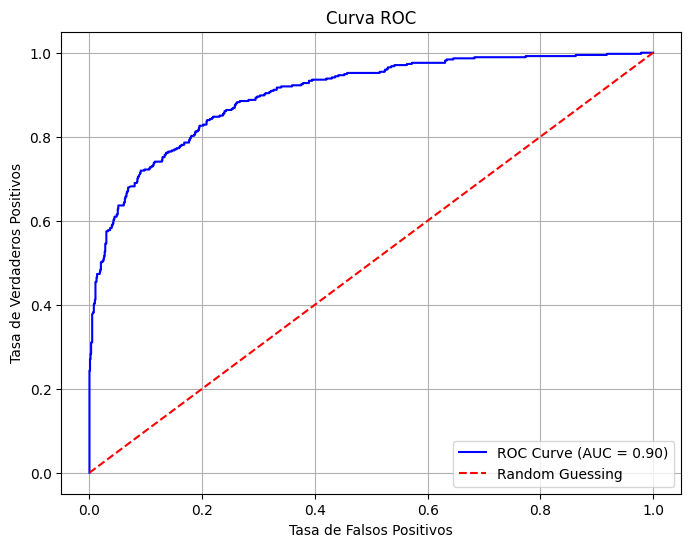

In [128]:
#para calcular la curva ROC
fpr, tpr, thresholds = roc_curve(target_test, proba_test)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_roc_test:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guessing")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Conclusiones

Como primera conclusión, debo señalar que la compañia Interconnect debiese utilizar el modelo creado para poder pronósticar la salida de sus clientes, desarollando de aquella manera, una estrategía de marketing adecuado que disminuya este factor.

Ahora me explayaré un poco más en lo que hubo que efectuar para llegar a este resultado.

Para el desarrollo del proyecto hubo que efectuar muchas iteraciones. Inicialmente comencé tomando todos los datos que entregaban y cometí el error de no considerar, por ejemplo, las fechas de inicio y término de contrato de los usuarios que dejaron la compañia. Esto generó que mis modelos estuvieran lejos de las métricas requeridas para obtener un buen puntaje. Para solucionar esto, primeramente descarté algunas columnas que no las consideraba necesarias para desarrollar los modelos. Sin embargo, una vez nuevamente llegada la hora de evaluar, no lograba acercarme a las métricas. Fue en este punto donde pensando un poco más allá, se me ocurrió utilizar la cantidad de días que los clientes llevaban siendolo hasta que abandonaron la compañia. Con ello pude generar una columna significativa y fue lo que determinó el éxito de los modelos presentados.